In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st 
import os
from tqdm import tqdm
os.chdir('D:\Shashi Katteri\Desktop\data sets to work on\house-prices-advanced-regression-techniques')

In [163]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [164]:
df=pd.concat([df1,df2],sort=False)

In [7]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [165]:
na=df.isnull().sum()

In [166]:
na=na[na>0]

In [167]:
na_cols=list(na.index)

In [168]:
na=df[na_cols].copy()

In [169]:
na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 35 columns):
MSZoning        2915 non-null object
LotFrontage     2433 non-null float64
Alley           198 non-null object
Utilities       2917 non-null object
Exterior1st     2918 non-null object
Exterior2nd     2918 non-null object
MasVnrType      2895 non-null object
MasVnrArea      2896 non-null float64
BsmtQual        2838 non-null object
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinType1    2840 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinType2    2839 non-null object
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
Electrical      2918 non-null object
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
KitchenQual     2918 non-null object
Functional      2917 non-null object
FireplaceQu     1499 non-null object
GarageType      2762 non-null objec

In [170]:
dummy_cols=['PoolQC','Fence','MiscFeature','Alley']
nan_na= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt',
 'GarageFinish', 'GarageQual', 'GarageCond','GarageCars','GarageArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','FireplaceQu']
na=na.drop(dummy_cols+['SalePrice'],axis=1)

In [171]:
na_mod={}
for i in tqdm(na.columns):
    if i not in nan_na: 
        if na[i].dtype=='O':
            mx=df1[i].value_counts()[df1[i].value_counts()==df1[i].value_counts().max()].index[0]
            na[i]=na[i].replace(np.nan,mx)
            na_mod[i]=mx

        elif na[i].dtype=='float64':
            mx=df1[i].median()
            na[i]=na[i].replace(np.nan,mx)
        

100%|██████████| 30/30 [00:00<00:00, 1355.86it/s]


In [172]:
na.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 30 columns):
MSZoning        2919 non-null object
LotFrontage     2919 non-null float64
Utilities       2919 non-null object
Exterior1st     2919 non-null object
Exterior2nd     2919 non-null object
MasVnrType      2919 non-null object
MasVnrArea      2919 non-null float64
BsmtQual        2838 non-null object
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinType1    2840 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinType2    2839 non-null object
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
Electrical      2919 non-null object
BsmtFullBath    2919 non-null float64
BsmtHalfBath    2919 non-null float64
KitchenQual     2919 non-null object
Functional      2919 non-null object
FireplaceQu     1499 non-null object
GarageType      2762 non-null object
GarageYrBlt     2760 non-null floa

In [173]:
na_mod   

{'MSZoning': 'RL',
 'Utilities': 'AllPub',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'MasVnrType': 'None',
 'Electrical': 'SBrkr',
 'KitchenQual': 'TA',
 'Functional': 'Typ',
 'SaleType': 'WD'}

In [174]:
for i in tqdm(nan_na):
     
    if na[i].dtype=='O':
        mx='NA'
        na[i]=na[i].replace(np.nan,mx)
        na_mod[i]=mx

    elif na[i].dtype=='float64':
        mx=0.0
        na[i]=na[i].replace(np.nan,mx)
        

100%|██████████| 17/17 [00:00<00:00, 1088.23it/s]


In [175]:
for i in na.columns:
    df[i]=na[i]


In [78]:
df[dummy_cols[0]].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [176]:
for i in dummy_cols:
    df[i+'_present']=(~df[i].isnull()).astype(int)
    df=df.drop(i,axis=1)

In [79]:
df[dummy_cols[1]].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [116]:
df[dummy_cols[2]].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [117]:
df[dummy_cols[3]].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id                     2919 non-null int64
MSSubClass             2919 non-null int64
MSZoning               2919 non-null object
LotFrontage            2919 non-null float64
LotArea                2919 non-null int64
Street                 2919 non-null object
LotShape               2919 non-null object
LandContour            2919 non-null object
Utilities              2919 non-null object
LotConfig              2919 non-null object
LandSlope              2919 non-null object
Neighborhood           2919 non-null object
Condition1             2919 non-null object
Condition2             2919 non-null object
BldgType               2919 non-null object
HouseStyle             2919 non-null object
OverallQual            2919 non-null int64
OverallCond            2919 non-null int64
YearBuilt              2919 non-null int64
YearRemodAdd           2919 non-null int64
RoofStyle          

In [179]:
objs=[]
for i in df.columns:
    if df[i].dtype=='O':
        objs.append(i)

In [181]:
for i in objs:
    print('\n')
    print(df[i].value_counts())



RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64


Pave    2907
Grvl      12
Name: Street, dtype: int64


Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64


Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64


AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64


Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64


Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64


NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64


Norm      2511
Feed

In [210]:
drop_cols=['Street','LandContour','Utilities','LandSlope','Condition2','BldgType','RoofStyle','RoofMatl',
          'Exterior1st','Exterior2nd','MasVnrType','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
           'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Electrical','Functional','FireplaceQu','GarageFinish','Functional',
           'GarageArea','PavedDrive','PoolArea','SaleType','LotShape','HouseStyle']
qual=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
      'KitchenQual','GarageQual','GarageCond']
len(drop_cols)

29

In [194]:
df2=df
df2['total_bathroom']=df2['BsmtFullBath']+df2['BsmtHalfBath']*0.5+ \
df2['FullBath']+df2['HalfBath']*0.5
df2=df2.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1)

In [195]:
df2['Condition_isnorm']=df2['Condition1'].apply(lambda x:0 if x=='Norm' else 1)
df2=df2.drop('Condition1',axis=1)

In [202]:
df2[qual]=df[qual]
for i in qual:
    df2[i]=df2[i].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

In [233]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 46 columns):
Id                     2919 non-null int64
MSSubClass             2919 non-null int64
MSZoning               2919 non-null object
LotFrontage            2919 non-null float64
LotArea                2919 non-null int64
LotConfig              2919 non-null object
Neighborhood           2919 non-null object
OverallQual            2919 non-null int64
OverallCond            2919 non-null int64
YearBuilt              2919 non-null int64
YearRemodAdd           2919 non-null int64
MasVnrArea             2919 non-null float64
ExterQual              2919 non-null int64
ExterCond              2919 non-null int64
Foundation             2919 non-null object
BsmtQual               2919 non-null int64
BsmtCond               2919 non-null int64
TotalBsmtSF            2919 non-null float64
HeatingQC              2919 non-null int64
CentralAir             2919 non-null object
1stFlrSF              

In [211]:
df2=df2.drop(drop_cols,axis=1)

In [230]:
df2['total_porchSF']=0
df2['total_porchSF']=df2['OpenPorchSF']+df2['EnclosedPorch']+df2['3SsnPorch']\
+df2['ScreenPorch']+df2['WoodDeckSF']
df2=df2.drop(['EnclosedPorch','OpenPorchSF','3SsnPorch','WoodDeckSF','ScreenPorch'],axis=1)

In [243]:
drop_num=['LotFrontage','GarageYrBlt','MoSold','MiscFeature_present',
          'Alley_present']
df2=df2.drop(drop_num,axis=1)

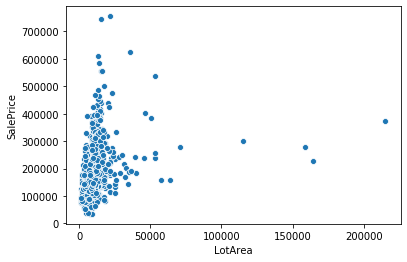

In [216]:
sns.scatterplot(data=df2 ,x='LotArea',y='SalePrice')

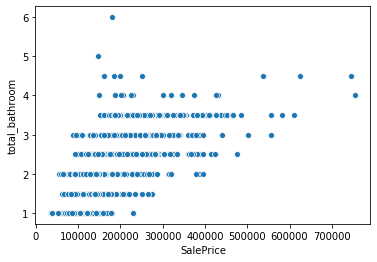

In [218]:
sns.scatterplot(data=df,x='SalePrice',y='total_bathroom')

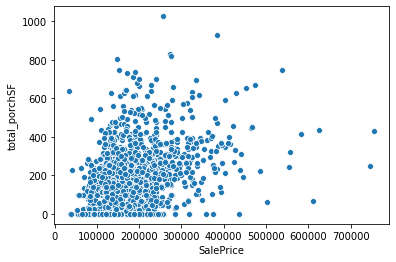

In [232]:
sns.scatterplot(data=df2,x='SalePrice',y='total_porchSF')

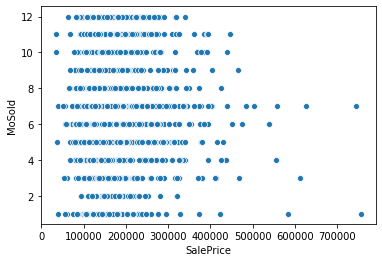

In [235]:
sns.scatterplot(data=df2,x='SalePrice',y='MoSold')

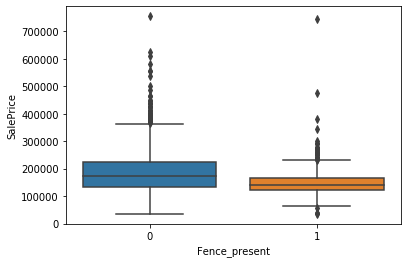

In [242]:
sns.boxplot(data=df2,y='SalePrice',x='Fence_present')

In [244]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 41 columns):
Id                  2919 non-null int64
MSSubClass          2919 non-null int64
MSZoning            2919 non-null object
LotArea             2919 non-null int64
LotConfig           2919 non-null object
Neighborhood        2919 non-null object
OverallQual         2919 non-null int64
OverallCond         2919 non-null int64
YearBuilt           2919 non-null int64
YearRemodAdd        2919 non-null int64
MasVnrArea          2919 non-null float64
ExterQual           2919 non-null int64
ExterCond           2919 non-null int64
Foundation          2919 non-null object
BsmtQual            2919 non-null int64
BsmtCond            2919 non-null int64
TotalBsmtSF         2919 non-null float64
HeatingQC           2919 non-null int64
CentralAir          2919 non-null object
1stFlrSF            2919 non-null int64
2ndFlrSF            2919 non-null int64
LowQualFinSF        2919 non-null int64
GrLi

In [270]:
ob1=[]
for i in df2.columns:
    if df2[i].dtype=='O':
        ob1.append(i)
        

In [271]:
d=pd.get_dummies(df2,columns=ob1,drop_first=True)

In [183]:
df1=pd.get_dummies(df,columns=objs,drop_first=True)

In [267]:
train=df1[df1.SalePrice.isnull()==False].copy()
t=df1[df1.SalePrice.isnull()==True].copy()
test=t.drop(['SalePrice','Id'],axis=1)

In [264]:
train.shape

(1460, 252)

In [265]:
test.shape

(1459, 250)

In [189]:
x=train.drop(['SalePrice','Id'],axis=1)
y=train['SalePrice']

In [391]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from statsmodels.api import OLS,add_constant

In [191]:
x_c=add_constant(x)
mod=OLS(y,x).fit()
mod.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              449.1
Date:                Sat, 11 Apr 2020   Prob (F-statistic):                        0.00
Time:                        23:02:28   Log-Likelihood:                         -16588.
No. Observations:                1460   AIC:                                  3.366e+04
Df Residuals:                    1218   BIC:                                  3.494e+04
Df Model:                         242                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass              -34.4183     82.926     -0.415      0.678    -197.113     128.276
LotFrontage              62.5904     43.978      1.423      0.155     -23.692     148.872
LotArea                   0.7238      0.110      6.583      0.000       0.508       0.940
OverallQual            6642.2447   1012.021      6.563      0.000    4656.746    8627.743
OverallCond            5729.0689    876.080      6.539      0.000    4010.275    7447.863
YearBuilt               321.1875     76.267      4.211      0.000     171.558     470.817
YearRemodAdd            103.5712     55.833      1.855      0.064      -5.968     213.110
MasVnrArea               19.0146      5.800      3.279      0.001       7.636      30.393
BsmtFinSF1               16.6119      2.888      5.752      0.000      10.946      22.278
BsmtFinSF2                8.0991      5.995      1.351      0.177      -3.662      19.860
BsmtUnfSF                -1.9300      2.776     -0.695      0.487      -7.376       3.516
TotalBsmtSF              22.7817      4.077      5.588      0.000      14.784      30.780
1stFlrSF                 15.1092      6.349      2.380      0.017       2.653      27.566
2ndFlrSF                 35.4026      5.446      6.500      0.000      24.717      46.088
LowQualFinSF            -19.1894     13.707     -1.400      0.162     -46.081       7.703
GrLivArea                31.3222      5.552      5.642      0.000      20.430      42.215
BsmtFullBath            974.3116   1984.067      0.491      0.623   -2918.257    4866.880
BsmtHalfBath           -202.6006   3036.836     -0.067      0.947   -6160.611    5755.409
FullBath               3769.2903   2208.583      1.707      0.088    -563.758    8102.339
HalfBath               1274.1323   2093.559      0.609      0.543   -2833.249    5381.514
BedroomAbvGr          -3562.3993   1366.943     -2.606      0.009   -6244.224    -880.575
KitchenAbvGr          -1.318e+04   5699.046     -2.313      0.021   -2.44e+04   -1999.601
TotRmsAbvGrd           1134.3216    948.419      1.196      0.232    -726.394    2995.037
Fireplaces             6429.5393   2560.178      2.511      0.012    1406.690    1.15e+04
GarageYrBlt             -27.1034     61.456     -0.441      0.659    -147.674      93.468
GarageCars             3823.7034   2291.400      1.669      0.095    -671.825    8319.231
GarageArea               18.3458      7.928      2.314      0.021       2.791      33.900
WoodDeckSF               14.4011      5.901      2.441      0.015       2.825      25.978
OpenPorchSF               1.3356     11.599      0.115      0.908     -21.420      24.091
EnclosedPorch             5.1201     12.495      0.410      0.682     -19.394      29.634
3SsnPorch     

In [251]:
lasso=Lasso(alpha=100,max_iter=10e6)
mod=lasso.fit(x,y)
c=mod.coef_

In [266]:
pd.set_option('display.max_rows',100)
cd=pd.DataFrame(c,index=x.columns)
p=mod.predict(test)

In [268]:
lol=pd.DataFrame({'SalePrice':p},index=t.Id)
lol.to_csv('lol.csv')

In [287]:
tr=d[d.SalePrice.isnull()==False].copy()
t1=d[d.SalePrice.isnull()==True].copy()
ts=t1.drop(['SalePrice','Id'],axis=1)

In [291]:
ts.shape

(1459, 81)

In [292]:
x1=tr.drop(['SalePrice','Id'],axis=1)
y1=tr.SalePrice

In [293]:
lasso=Lasso(alpha=1,max_iter=10e6)
mod=lasso.fit(x1,y1)
c1=mod.coef_
p=mod.predict(ts)

In [294]:
lol=pd.DataFrame({'SalePrice':p},index=t.Id)
lol.to_csv('lol1.csv')

In [297]:
rfc=RandomForestRegressor(n_estimators=250,criterion='mae',max_depth=10)
mod1=rfc.fit(x1,y1)
p=mod1.predict(ts)
lol=pd.DataFrame({'SalePrice':p},index=t1.Id)
lol.to_csv('lol2.csv')

# Data Preperation

In [298]:
df3=df

In [299]:
df3=df
df3['total_bathroom']=df3['BsmtFullBath']+df3['BsmtHalfBath']*0.5+ \
df3['FullBath']+df3['HalfBath']*0.5
df3=df3.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1)

In [300]:
df3['Condition_isnorm']=df3['Condition1'].apply(lambda x:0 if x=='Norm' else 1)
df3=df3.drop('Condition1',axis=1)

In [301]:
df3[qual]=df[qual]
for i in qual:
    df2[i]=df2[i].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

In [311]:
df3['MSSubClass']=df3['MSSubClass'].astype('object')

In [303]:
df3['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

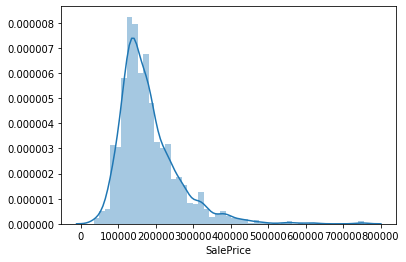

In [305]:
sns.distplot(y)

In [309]:
y.skew()

1.8828757597682129

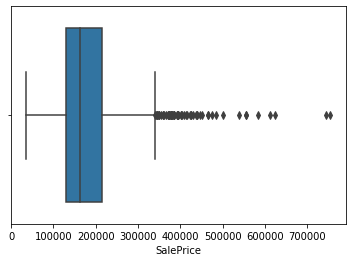

In [306]:
sns.boxplot(y)

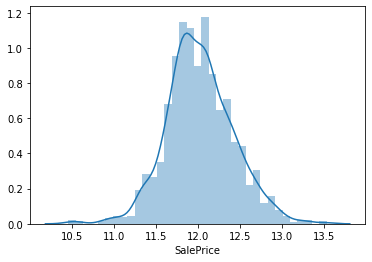

In [307]:
sns.distplot(np.log(y))

In [308]:
yln=np.log(y)
yln.skew()

0.12133506220520406

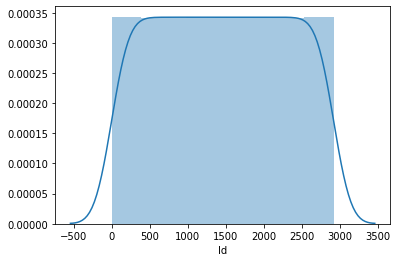

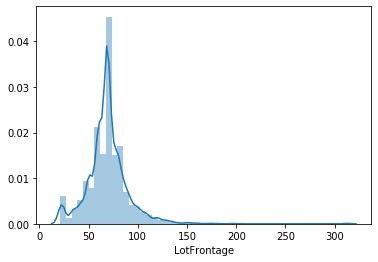

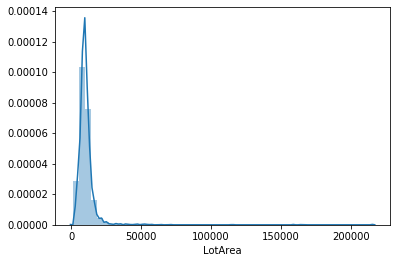

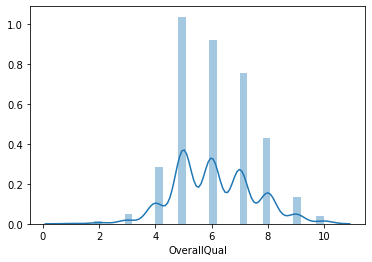

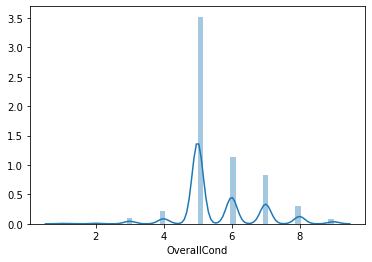

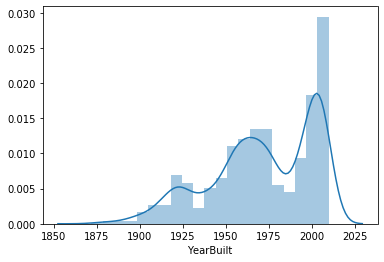

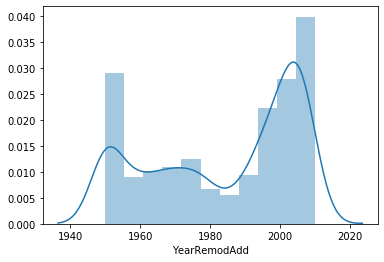

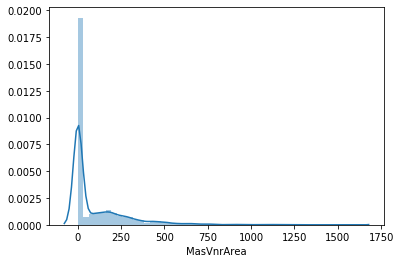

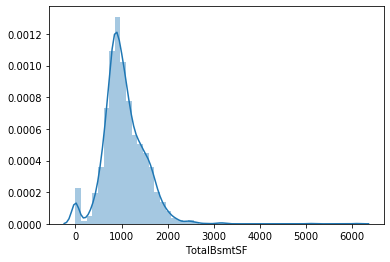

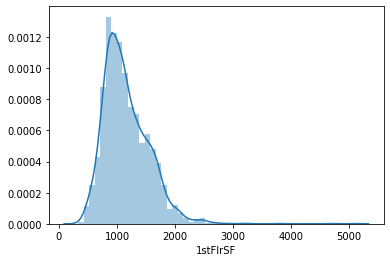

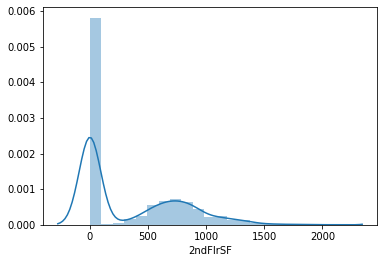

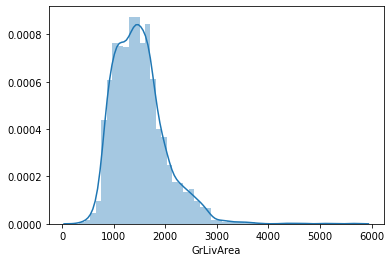

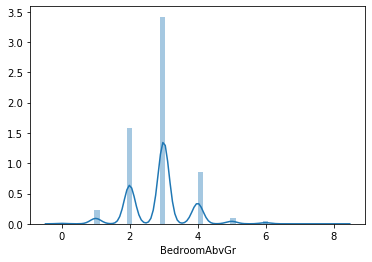

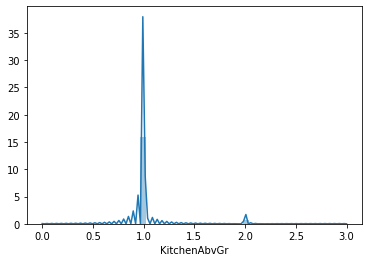

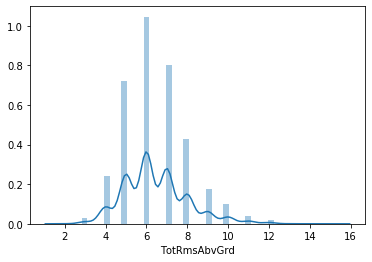

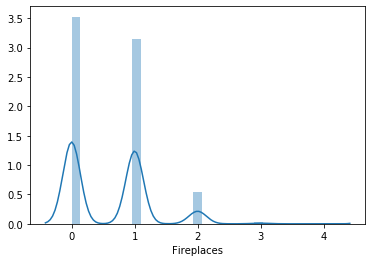

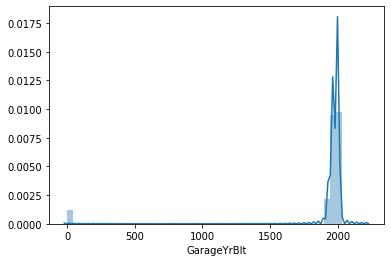

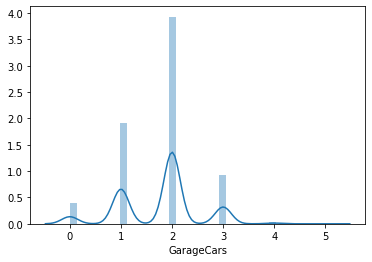

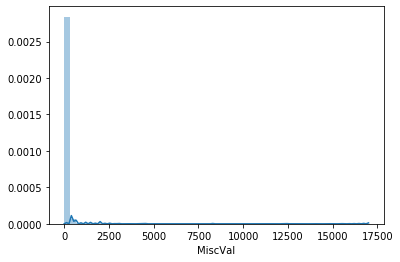

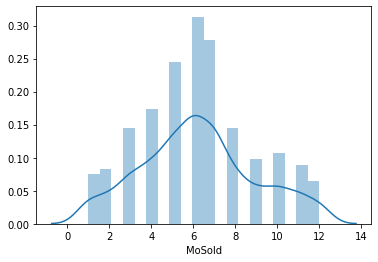

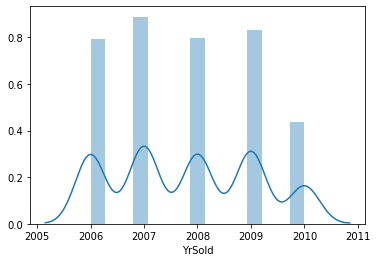

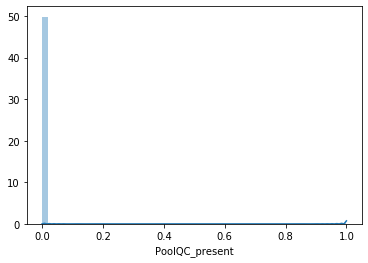

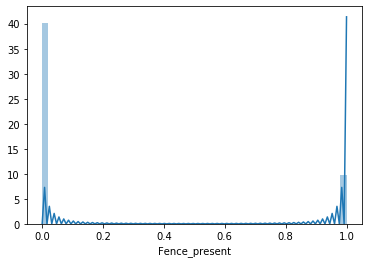

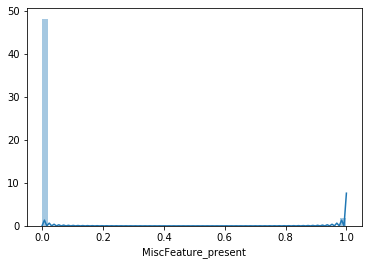

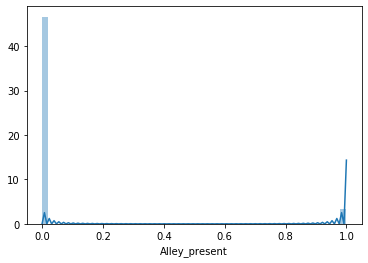

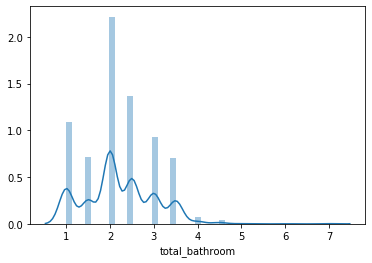

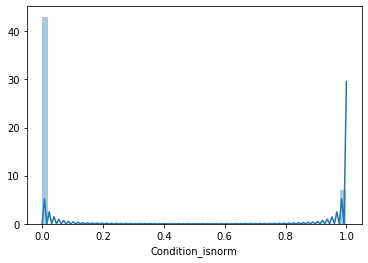

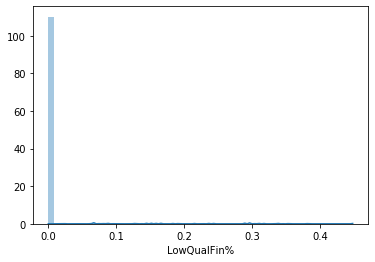

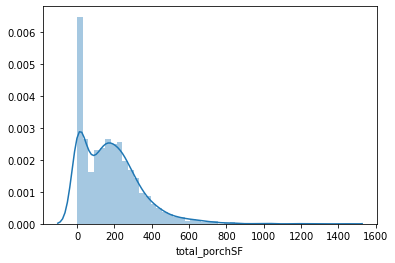

In [325]:
for i in df3.columns:
    if (df3[i].dtype!='O')&(i!='SalePrice'):
        sns.distplot(df3[i])
        plt.show()
        

In [323]:
df3['total_porchSF']=0
df3['total_porchSF']=df3['OpenPorchSF']+df3['EnclosedPorch']+df3['3SsnPorch']+df3['ScreenPorch']+df3['WoodDeckSF']
df3=df3.drop(['EnclosedPorch','OpenPorchSF','3SsnPorch','WoodDeckSF','ScreenPorch'],axis=1)

In [313]:
drop_cols=['Street','LandContour','Utilities','LandSlope','Condition2','BldgType','RoofStyle','RoofMatl',
          'Exterior1st','Exterior2nd','BsmtFinType1','BsmtFinType2','Heating',
           'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Electrical','FireplaceQu','GarageFinish',
           'GarageArea','PavedDrive','PoolArea','SaleType','LotShape','HouseStyle',]
drp2=['GarageYrBlt','MiscVal','MoSold','YrSold','Alley_present']
df3=df3.drop(drop_cols,axis=1)

In [315]:
log_trans_cols=['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF']

In [320]:
df3['LowQualFin%']=df3['LowQualFinSF']/df3['GrLivArea']
df3=df3.drop('LowQualFinSF',axis=1)

In [326]:
df3[log_trans_cols]=df3[log_trans_cols].apply(np.log)

In [331]:
df3[log_trans_cols]=df3[log_trans_cols].replace(-np.inf,0)

In [335]:
df3[qual]=df[qual]
for i in qual:
    df3[i]=df3[i].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

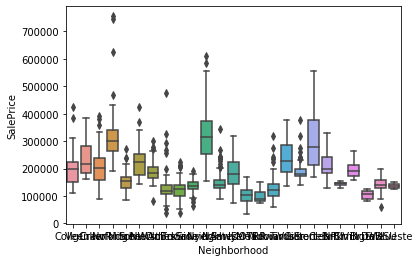

In [338]:
sns.boxplot(data=df3,y='SalePrice',x='Neighborhood')

In [339]:
cat1=[]
for i in df3.columns:
    if df3[i].dtype=='O':
        cat1.append(i)
d1=pd.get_dummies(df3,columns=cat1,drop_first=True)
d1.shape

(2919, 115)

In [342]:
#d1=d1.drop('Id',axis=1)
train3=d1[d1['SalePrice'].isnull()==False]
test3=d1[d1['SalePrice'].isnull()==True].drop('SalePrice',axis=1)

In [343]:
test3.shape

(1459, 113)

In [344]:
train3.shape

(1460, 114)

In [345]:
x3=train3.drop('SalePrice',axis=1)
y3=np.log(train3.SalePrice)

In [347]:
x3_tr,x3_ts,y3_tr,y3_ts=train_test_split(x3,y3,test_size=0.3,random_state=6969)

lr=LinearRegression()
rf=RandomForestRegressor(n_estimators=150)
lgb=LGBMRegressor()
lasso=Lasso(alpha=0.2)

In [349]:
models={'Linear Regression':lr,'Random Forest':rf,'Light GBM':lgb,'Lasso':lasso}
mod3={}
for i in models:
    print('\n',i)
    a=models[i].fit(x3_tr,y3_tr)
    pred_ts=a.predict(x3_ts)
    pred_tr=a.predict(x3_tr)
    print('\nTrain Scores')
    tr_r2=r2_score(y3_tr,pred_tr)
    tr_mae=mean_absolute_error(y3_tr,pred_tr)
    tr_mse=mean_squared_error(y3_tr,pred_tr)
    print('R2:',tr_r2)
    print('MAE:',tr_mae)
    print('MSE:',tr_mse)
    print('\nTest Scores')
    ts_r2=r2_score(y3_ts,pred_ts)
    ts_mae=mean_absolute_error(y3_ts,pred_ts)
    ts_mse=mean_squared_error(y3_ts,pred_ts)
    print('R2:',ts_r2)
    print('MAE:',ts_mae)
    print('MSE:',ts_mse)
    mod3[i]=a


 Linear Regression

Train Scores
R2: 0.931467828081721
MAE: 0.07022419130006824
MSE: 0.01066801418429805

Test Scores
R2: 0.8556354448070043
MAE: 0.09461333337939613
MSE: 0.024186513249791573

 Random Forest

Train Scores
R2: 0.9819134351476785
MAE: 0.03569661736182764
MSE: 0.0028154328834036194

Test Scores
R2: 0.8547047561604624
MAE: 0.10373523454810213
MSE: 0.024342438734762047

 Light GBM

Train Scores
R2: 0.9873063820509261
MAE: 0.026484612133706047
MSE: 0.0019759434516719594

Test Scores
R2: 0.8717206628454012
MAE: 0.09607804111013338
MSE: 0.021491631956447974

 Lasso

Train Scores
R2: 0.7663620651314302
MAE: 0.13993307069138047
MSE: 0.036369091091117425

Test Scores
R2: 0.7128344305403906
MAE: 0.14797259706736898
MSE: 0.048111074365404675


In [352]:
for i in models:
    a=models[i].fit(x3,y3)
    pred=a.predict(test3)
    p=np.exp(pred)
    print(p.mean())
    result=pd.DataFrame({'SalePrice':p},index=t1.Id)
    result.to_csv('result_'+i+'.csv')

178399.53276935115
176895.85508314188
177973.2820505167
174524.20154069582


In [356]:
params={'num_leaves':st.randint(20,50),
    'max_depth':st.randint(2,50),
    'learning_rate':st.uniform(0,1),
    'n_estimators':st.randint(100,250) ,}
rs=RandomizedSearchCV(lgb,param_distributions=params,scoring='neg_mean_absolute_error',n_jobs=-1,cv=5)
rm=rs.fit(x3,y3)
bp=rm.best_params_
print(bp,'\n',rm.best_score_)

{'learning_rate': 0.1758192774139571, 'max_depth': 17, 'n_estimators': 176, 'num_leaves': 27} 
 -0.09312744238617288


In [357]:
lgb=LGBMRegressor(**bp)
lm=lgb.fit(x3,y3)
pred=lm.predict(test3)
p=np.exp(pred)
result=pd.DataFrame({'SalePrice':p},index=t1.Id)
result.to_csv('result_lgb_bp.csv')


In [375]:
dr=list(feat['cols'][feat['rank']!=1])
len(dr)

47

In [376]:
x3_rfe=x3.drop(dr,axis=1)
x3_test=test3.drop(dr,axis=1)
lgb=LGBMRegressor(**bp)
lm=lgb.fit(x3_rfe,y3)
pred=lm.predict(x3_test)
p=np.exp(pred)
result=pd.DataFrame({'SalePrice':p},index=t1.Id)
result.to_csv('result_lgb_rfe.csv')


# Trying RFE combined with Adjusted R2

In [358]:
def adj_r2(y_true,y_pred,samp_size,no_feat):
    r2=r2_score(y_true,y_pred)
    adr2=1-((1-r2)*(samp_size-1)/(samp_size-no_feat-1))
    return r2,adr2

In [363]:
from sklearn.feature_selection import RFECV,RFE

In [364]:
x.shape

(1460, 250)

In [372]:

rfe=RFECV(lgb,scoring='neg_mean_absolute_error')
mod=rfe.fit(x3,y3)
feat=pd.DataFrame({'cols':x3.columns,'rank':mod.ranking_})
feat[feat['rank']!=1]

,cols,rank
28,PoolQC_present,44
30,MiscFeature_present,17
34,LowQualFin%,19
37,MSSubClass_40,41
38,MSSubClass_45,45
39,MSSubClass_50,2
40,MSSubClass_60,10
41,MSSubClass_70,4
42,MSSubClass_75,32
43,MSSubClass_80,5


In [389]:
del r2_score

In [394]:
adjr2_score=[]
r2score=[]
high=0
n=0
for i in tqdm(range(1,x3.shape[1])):
    rfe=RFE(lr,i)
    xtr,xts,ytr,yts=train_test_split(x3,np.log(y),test_size=0.3,random_state=6969)
    mr=rfe.fit_transform(xtr,ytr)
    x_rfe=rfe.transform(xts)
    m_rfe=lr.fit(mr,ytr)
    pred=m_rfe.predict(x_rfe)
    
    r2,adr2=adj_r2(yts,pred,x_rfe.shape[0],i)
    r2score.append(r2)
    adjr2_score.append(adr2)
    if adr2>high:
        high=adr2
        n=i
print(i)
print(high)
    
    

100%|██████████| 112/112 [00:42<00:00,  2.62it/s]


112
0.8410175839354244
